In [1]:
import tensorflow as tf

In [2]:
from absl import logging

# Experiment with ABSL logging

In [4]:
logging.info('Interesting Stuff')
logging.info('Interesting Stuff with Arguments: %d', 42)

logging.set_verbosity(logging.INFO)
logging.log(logging.DEBUG, 'This will *not* be printed')
logging.debug("also not printed")

logging.set_verbosity(logging.DEBUG)
logging.log(logging.DEBUG, 'This will be printed')
logging.debug("this also will be printed")

logging.warning('Worrying Stuff')
logging.error('Alarming Stuff')
# logging.fatal('yikes!')

INFO:absl:Interesting Stuff
INFO:absl:Interesting Stuff with Arguments: 42
DEBUG:absl:This will be printed
DEBUG:absl:this also will be printed
ERROR:absl:Alarming Stuff


# At the time this was last run we were using using latest TensorFlow
## TensorFlow 2 (specifically 2.9.1)

In [8]:
logging.set_verbosity(logging.INFO)
logging.info("Using Tensorflow version {}".format(tf.__version__))

INFO:absl:Using Tensorflow version 2.9.1


# The Dataset (MNIST)

In [9]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Shape of imported arrays

In [10]:
print("x_train {} y_train {} x_test{} y_test{}".format(
x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train (60000, 28, 28) y_train (60000,) x_test(10000, 28, 28) y_test(10000,)


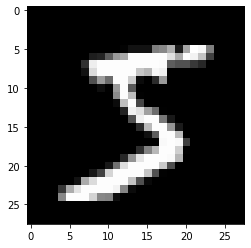

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

# plt.imshow(x_train[0], cmap='binary')
plt.imshow(x_train[0], cmap='gray')
plt.show()

# Display label and set(label)

In [14]:
print(y_train[0])
print(set(y_train))

5
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# One-hot encode the output (class)

In [15]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Validated shapes

In [17]:
print('y_train_encoded.shape: {}'.format(y_train_encoded.shape))
print('y_test_encoded.shape: {}'.format(y_test_encoded.shape))

y_train_encoded.shape: (60000, 10)
y_test_encoded.shape: (10000, 10)


# Display encoded labels

In [18]:
print(y_train_encoded[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Neural Network...

## Unroll the input data (this is not a convolutional example)

In [21]:
import numpy as np
x_train_reshaped = np.reshape(x_train, (60000, 28*28))
x_test_reshaped = np.reshape(x_test, (10000, 28*28))
print("x_train_reshaped.shape {}".format(x_train_reshaped.shape))
print("x_test_reshaped.shape {}".format(x_test_reshaped.shape))

x_train_reshaped.shape (60000, 784)
x_test_reshaped.shape (10000, 784)


# Display pixel values

In [30]:
print(set(x_train_reshaped[0]))
print()
print(x_train_reshaped[0])

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0

# Data Normalization

In [24]:
mean = np.mean(x_train_reshaped)
std = np.std(x_train_reshaped)
epsilon = 1e-10
x_train_norm = (x_train_reshaped - mean) / (std + epsilon)
x_test_norm = (x_test_reshaped - mean) / (std + epsilon)

# Display Normalized Pixel Values

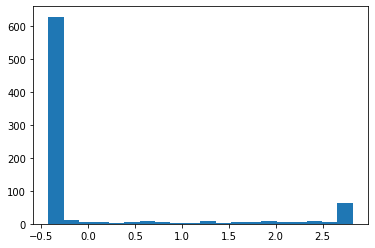

In [37]:
plt.hist(x_train_norm[0], bins=20)
plt.show()

## Creating a Model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


# Compiling the Model

In [49]:
model.compile(
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [65]:
model.fit(x_train_norm, y_train_encoded, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.1099 - accuracy: 0.9679


# Evaluate the Model

In [66]:
loss,accuracy = model.evaluate(x_test_norm, y_test_encoded)
print("accuracy percent {}".format(accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1162 - accuracy: 0.9640
accuracy percent 96.39999866485596


# Predictions

In [67]:
preds = model.predict(x_test_norm)
print("Shape of predictions: {}".format(preds.shape))

313/313 [==============================] - 1s 2ms/step
Shape of predictions: (10000, 10)


# Plotting the results

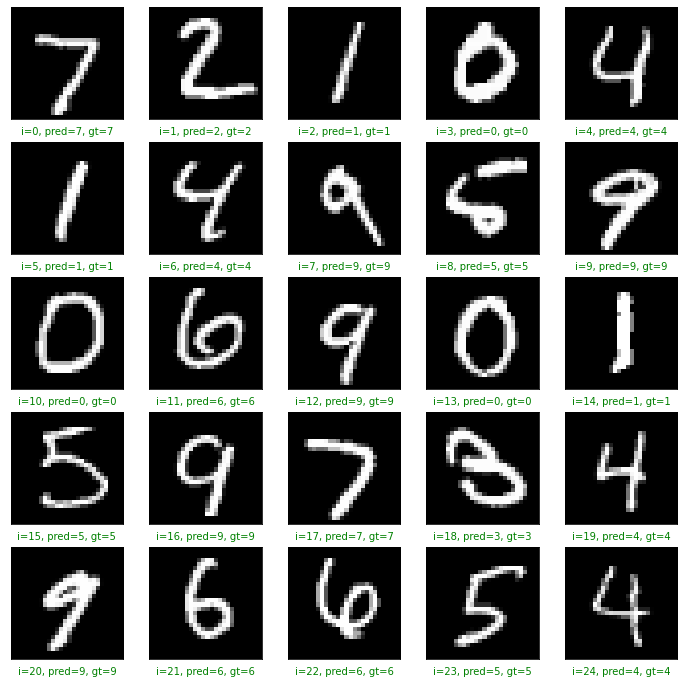

In [68]:
plt.figure(figsize=(12,12))
start_index = 0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='gray')
plt.show()
    
    

In [ ]:
plt.plot(predc)